In [1]:
import numpy as np
import pandas as pd

#loading the training and test data
insurance_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Training_set_label.csv" )
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Testing_set_label.csv')

In [2]:
#taking a look at the dataset
insurance_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0


In [3]:
#also the variable types and information distribution
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  object 
 1   Agency Type           48260 non-null  object 
 2   Distribution Channel  48260 non-null  object 
 3   Product Name          48260 non-null  object 
 4   Duration              48260 non-null  int64  
 5   Destination           48260 non-null  object 
 6   Net Sales             48260 non-null  float64
 7   Commision (in value)  48260 non-null  float64
 8   Gender                13899 non-null  object 
 9   Age                   48260 non-null  int64  
 10  Claim                 48260 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.1+ MB


We have 6 columns out of 10, the 11th column is our target variable, which are text values. And there is at least one column with NaN values. So we will start by checking how many NaN values we have and we will go from there.

In [4]:
#checking the NaN values across the columns
insurance_data.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  34361
Age                         0
Claim                       0
dtype: int64

In [5]:
#checking the percentage of NaN values in the Gender column
round(insurance_data.Gender.isna().sum()/insurance_data.shape[0],2)

0.71

As we have a little bit more than 70% of missing values in the Gender column the adopted measure will be to drop this column.

In [6]:
#dropping the gender column
insurance_data.drop(columns='Gender',inplace=True)

Now we will check the string type columns one by one, and see what we can do. But first we need to check if the value found are the same in both sets.

In [7]:
len(test_data.Agency.value_counts()), len(insurance_data.Agency.value_counts())

(16, 16)

In [8]:
test_data.Agency.value_counts().index.isin((insurance_data.Agency.value_counts().index))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [9]:
len(test_data['Product Name'].value_counts()),len(insurance_data['Product Name'].value_counts())

(25, 26)

In [10]:
test_data['Product Name'].value_counts().index.isin(insurance_data['Product Name'].value_counts().index)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [11]:
len(test_data['Agency Type'].value_counts()), len(insurance_data['Agency Type'].value_counts())

(2, 2)

In [12]:
test_data['Agency Type'].value_counts().index.isin(insurance_data['Agency Type'].value_counts().index)

array([ True,  True])

In [13]:
len(test_data['Distribution Channel'].value_counts()), len(insurance_data['Distribution Channel'].value_counts())

(2, 2)

In [14]:
test_data['Distribution Channel'].value_counts().index.isin(insurance_data['Distribution Channel'].value_counts().index)

array([ True,  True])

In [15]:
len(test_data['Destination'].value_counts()), len(insurance_data['Destination'].value_counts())

(117, 141)

In [16]:
test_data['Destination'].value_counts().index.isin(insurance_data['Destination'].value_counts().index)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True, False, False,  True])

We have found some unmatched values so we're going to further investigate it

In [17]:
destinations = insurance_data['Destination'].value_counts().index

test_destinations_unmatched = test_data[~test_data['Destination'].isin(destinations)]
test_destinations_unmatched.Destination.value_counts()

SENEGAL                     1
CAMEROON                    1
TURKS AND CAICOS ISLANDS    1
TAJIKISTAN                  1
NEW CALEDONIA               1
SIERRA LEONE                1
MOLDOVA, REPUBLIC OF        1
RWANDA                      1
Name: Destination, dtype: int64

All of them only appear once so we'll look into it when we address this column

In [18]:
#we will look at how many different values there are in each column, and how much each one appears
len(insurance_data.Agency.value_counts()), insurance_data.Agency.value_counts()

(16,
 EPX    26712
 CWT     6572
 C2B     6280
 JZI     4851
 SSI      807
 JWT      580
 RAB      577
 LWC      532
 TST      389
 KML      293
 ART      248
 CCR      155
 TTW       72
 CBH       70
 CSR       66
 ADM       56
 Name: Agency, dtype: int64)

In [19]:
insurance_data['Agency Type'].value_counts()

Travel Agency    34917
Airlines         13343
Name: Agency Type, dtype: int64

In [20]:
insurance_data['Distribution Channel'].value_counts()

Online     47434
Offline      826
Name: Distribution Channel, dtype: int64

In [21]:
len(insurance_data['Product Name'].value_counts()), insurance_data['Product Name'].value_counts()

(26,
 Cancellation Plan                       14202
 2 way Comprehensive Plan                10000
 Rental Vehicle Excess Insurance          6572
 Basic Plan                               4209
 Bronze Plan                              3057
 1 way Comprehensive Plan                 2510
 Value Plan                               2082
 Silver Plan                              1705
 Annual Silver Plan                       1088
 Ticket Protector                          807
 Travel Cruise Protect                     388
 Gold Plan                                 279
 Comprehensive Plan                        279
 24 Protect                                183
 Single Trip Travel Protect Gold           156
 Annual Gold Plan                          151
 Single Trip Travel Protect Silver         146
 Premier Plan                              143
 Annual Travel Protect Gold                 77
 Annual Travel Protect Silver               64
 Single Trip Travel Protect Platinum        53
 Individ

In [22]:
#let's check the average number of times a product appears, and the median of its appearance
insurance_data['Product Name'].value_counts().mean(), insurance_data['Product Name'].value_counts().median()

(1856.1538461538462, 231.0)

In [23]:
len(insurance_data['Destination'].value_counts()), insurance_data['Destination'].value_counts()

(141,
 SINGAPORE                 10068
 THAILAND                   4509
 MALAYSIA                   4479
 CHINA                      3642
 AUSTRALIA                  2807
                           ...  
 ALBANIA                       1
 URUGUAY                       1
 REPUBLIC OF MONTENEGRO        1
 GUINEA-BISSAU                 1
 ANGOLA                        1
 Name: Destination, Length: 141, dtype: int64)

In [24]:
#let's check the average number of times a destination appears, and the median of its appearance
insurance_data['Destination'].value_counts().mean(), insurance_data['Destination'].value_counts().median()

(342.2695035460993, 10.0)

In [25]:
#creating a list with all the destination that have less than 10 appearances
destination_frequency = insurance_data['Destination'].value_counts()
destination_sub10 = destination_frequency .loc[destination_frequency <10]

#list of destinations of countries with less than 10 appearances
destination_sub10.index

Index(['PAPUA NEW GUINEA', 'FIJI', 'BULGARIA', 'SERBIA', 'UZBEKISTAN',
       'MAURITIUS', 'MALTA', 'UKRAINE', 'BOLIVIA', 'LUXEMBOURG', 'BAHRAIN',
       'COSTA RICA', 'KYRGYZSTAN', 'ETHIOPIA', 'AZERBAIJAN', 'ECUADOR',
       'TUNISIA', 'ESTONIA', 'GUAM', 'VENEZUELA', 'KUWAIT', 'LITHUANIA',
       'GHANA', 'NAMIBIA', 'SLOVENIA', 'BHUTAN', 'LEBANON', 'VANUATU',
       'UGANDA', 'PUERTO RICO', 'TRINIDAD AND TOBAGO', 'CAYMAN ISLANDS',
       'REUNION', 'BERMUDA', 'MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF',
       'IRAN, ISLAMIC REPUBLIC OF', 'MALI', 'ZAMBIA', 'BELARUS', 'GUINEA',
       'PANAMA', 'FAROE ISLANDS', 'FRENCH POLYNESIA', 'TURKMENISTAN',
       'JAMAICA', 'SAMOA', 'LATVIA', 'BOSNIA AND HERZEGOVINA',
       'DOMINICAN REPUBLIC', 'LIBYAN ARAB JAMAHIRIYA',
       'KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF', 'ZIMBABWE',
       'NORTHERN MARIANA ISLANDS', 'TIBET', 'BARBADOS', 'BOTSWANA',
       'GUADELOUPE', 'VIRGIN ISLANDS, U.S.', 'SOLOMON ISLANDS', 'GUATEMALA',
       'ARMENIA', 'S

In [26]:
#total number of appearances of destinations that appear 10 or less times vs destinations that appear more than 10
destination_over10 = destination_frequency .loc[destination_frequency >=10]
destination_over10.sum(), destination_sub10.sum()

(48029, 231)

We will dummify all the string like columns. However since the destination column has a lot of values with low frequency(<10, 231 appearances total, vs 48029 of the remaining destinations) we will transform all this destinations into a new category called others and afterwards we will apply the dummification.

In [27]:
#getting the list with condition above and replacing it in the original dataframe
others_destination = destination_sub10.index
insurance_data.Destination.replace(others_destination,'OTHERS',inplace=True)
#checking the new frequency
insurance_data.Destination.value_counts()

SINGAPORE    10068
THAILAND      4509
MALAYSIA      4479
CHINA         3642
AUSTRALIA     2807
             ...  
GEORGIA         12
JORDAN          12
EGYPT           12
MOROCCO         11
CYPRUS          10
Name: Destination, Length: 72, dtype: int64

In [28]:
#checking the new list of destinations
insurance_data.Destination.value_counts().index

Index(['SINGAPORE', 'THAILAND', 'MALAYSIA', 'CHINA', 'AUSTRALIA', 'INDONESIA',
       'UNITED STATES', 'PHILIPPINES', 'HONG KONG', 'INDIA', 'JAPAN',
       'VIET NAM', 'KOREA, REPUBLIC OF', 'UNITED KINGDOM',
       'TAIWAN, PROVINCE OF CHINA', 'BRUNEI DARUSSALAM', 'MYANMAR',
       'NEW ZEALAND', 'CANADA', 'CAMBODIA', 'FRANCE', 'ITALY', 'GERMANY',
       'NETHERLANDS', 'SPAIN', 'OTHERS', 'UNITED ARAB EMIRATES', 'SRI LANKA',
       'SWITZERLAND', 'NORWAY', 'SOUTH AFRICA',
       'LAO PEOPLE'S DEMOCRATIC REPUBLIC', 'ICELAND', 'IRELAND', 'NEPAL',
       'MACAO', 'GREECE', 'DENMARK', 'AUSTRIA', 'BANGLADESH', 'PERU',
       'PORTUGAL', 'FINLAND', 'RUSSIAN FEDERATION', 'TURKEY', 'SWEDEN',
       'SAUDI ARABIA', 'CZECH REPUBLIC', 'CROATIA', 'BELGIUM', 'MONGOLIA',
       'ISRAEL', 'MEXICO', 'BRAZIL', 'POLAND', 'PAKISTAN', 'MALDIVES',
       'ARGENTINA', 'HUNGARY', 'KENYA', 'ROMANIA',
       'TANZANIA, UNITED REPUBLIC OF', 'QATAR', 'CHILE', 'COLOMBIA',
       'KAZAKHSTAN', 'OMAN', 'GEORGIA', 'J

In [29]:
insurance_data.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Age',
       'Claim'],
      dtype='object')

In [30]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(columns=col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df;

dummy_na = False
dummy_cols =['Agency', 'Agency Type', 'Distribution Channel', 'Product Name','Destination']

#dummifyin the columns above
insurance_data = create_dummy_df(insurance_data,dummy_cols,dummy_na)
insurance_data

,Duration,Net Sales,Commision (in value),Age,Claim,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,...,Destination_SWEDEN,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA","Destination_TANZANIA, UNITED REPUBLIC OF",Destination_THAILAND,Destination_TURKEY,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_VIET NAM
0,61,19.8,11.88,29,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,93,63.0,0.00,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,22.0,0.00,25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,14,54.5,13.63,24,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,90,10.0,0.00,23,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48255,39,44.0,0.00,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48256,20,60.0,15.00,30,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48257,19,29.7,17.82,43,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48258,7,20.0,0.00,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we we will take a look at the continuos/discrete type columns, by quickly plotting its distribution

<AxesSubplot:ylabel='Frequency'>

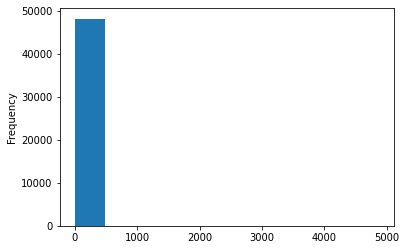

In [31]:
insurance_data['Duration'].plot.hist(bins=10)

This plot suggest there are outliers in this column, so we will further investigate this

In [32]:
insurance_data['Duration'].value_counts()

5       1600
6       1564
7       1495
8       1485
4       1476
        ... 
329        1
295        1
302        1
423        1
4829       1
Name: Duration, Length: 442, dtype: int64

In [33]:
#let's see how many values are above 1000 days
insurance_data.loc[insurance_data.loc[:,'Duration']>1000]

,Duration,Net Sales,Commision (in value),Age,Claim,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,...,Destination_SWEDEN,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA","Destination_TANZANIA, UNITED REPUBLIC OF",Destination_THAILAND,Destination_TURKEY,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_VIET NAM
1466,4857,0.32,0.09,48,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6761,4652,0.32,0.09,48,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16407,4881,0.13,0.04,48,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19777,4847,0.32,0.09,48,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21373,4685,0.32,0.09,48,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21404,4844,0.32,0.09,48,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23060,4736,0.32,0.09,48,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23471,4815,0.32,0.09,48,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28496,4580,0.32,0.09,48,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31045,4831,0.32,0.09,48,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:ylabel='Frequency'>

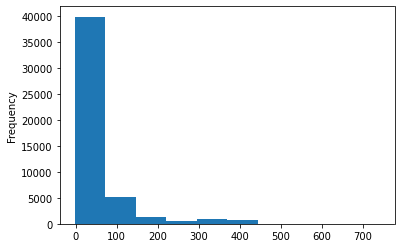

In [34]:
#let's see how the distrubtion looks like without the values above
insurance_data.loc[insurance_data.loc[:,'Duration']<1000,'Duration'].plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

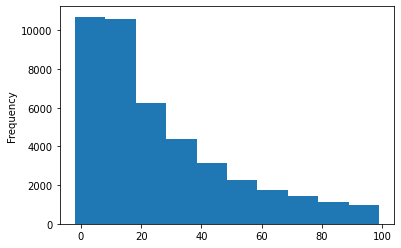

In [35]:
#we can observe that the majority of the values are under 100, so let's look at the distribution below 100
insurance_data.loc[insurance_data.loc[:,'Duration']<100,'Duration'].plot.hist(bins=10)

Looking at this distribution an initial assumption would be to categorize the Destination column in the following way:
steps of 20 till 100, then steps of 100 till 500, and a final category above 500

In [36]:
#applying the categorization described above
bins = [0, 20, 40, 60, 80, 100, 200, 300, 400, 500, np.inf]
names = ['<20', '20-40', '40-60', '60-80', '80-100', '100-200', '200-300', '300-400', '400-500','500+']

insurance_data['Duration'] = pd.cut(insurance_data['Duration'], bins, labels=names)
insurance_data

,Duration,Net Sales,Commision (in value),Age,Claim,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,...,Destination_SWEDEN,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA","Destination_TANZANIA, UNITED REPUBLIC OF",Destination_THAILAND,Destination_TURKEY,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_VIET NAM
0,60-80,19.8,11.88,29,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,80-100,63.0,0.00,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20-40,22.0,0.00,25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,<20,54.5,13.63,24,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,80-100,10.0,0.00,23,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48255,20-40,44.0,0.00,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48256,<20,60.0,15.00,30,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48257,<20,29.7,17.82,43,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48258,<20,20.0,0.00,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:ylabel='Frequency'>

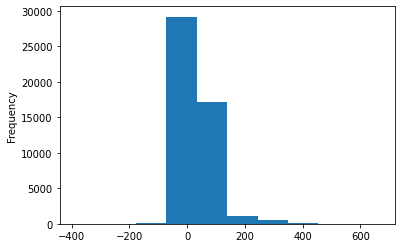

In [37]:
#doing the same analysis for the Net Sales column
insurance_data['Net Sales'].plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

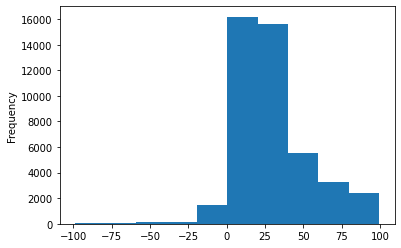

In [38]:
#we can see that the majority of the values are around 0 so let's take a closer look at that window
insurance_data.loc[(insurance_data.loc[:,'Net Sales']<100) & (insurance_data.loc[:,'Net Sales']>-100) ,'Net Sales'].plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

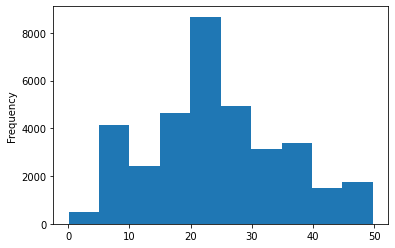

In [39]:
#looking at the 0-50 window
insurance_data.loc[(insurance_data.loc[:,'Net Sales']<50) & (insurance_data.loc[:,'Net Sales']>0) ,'Net Sales'].plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

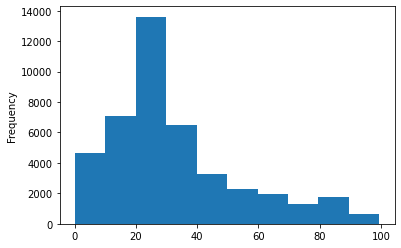

In [40]:
#0-100 window
insurance_data.loc[(insurance_data.loc[:,'Net Sales']<100) & (insurance_data.loc[:,'Net Sales']>0) ,'Net Sales'].plot.hist(bins=10)

In [41]:
#checking the maximum and minimum values
insurance_data['Net Sales'].max(),insurance_data['Net Sales'].min()

(666.0, -389.0)

So according to these values a good starting point might be:
<-200, -200 to -100, -100 to -50, -50 to -25, -25 to 0, then steps of 5 to 50, then steps of 10 to 100, then steps of 100 to 400, and finally 400+

In [42]:
#applying the categorization described above
bins_net_sales = [-np.inf, -200, -100, -50 , -25, 0, 5, 10, 15, 20, 25, 30, 35, 40, 
        45, 50, 60, 70, 80, 90, 100, 200, 300, 400, np.inf]
names_net_sales = ['<-200', '-200_to_-100', '-100_to_-50', '-50_to -25', '-25_to_0', 
         '0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35','35-40','40-45','45-50','50-60',
                  '60-70','70-80','80-90','90-100','100-200','200-300','300-400','400+']

insurance_data['Net Sales'] = pd.cut(insurance_data['Net Sales'], bins_net_sales, labels=names_net_sales)
insurance_data

,Duration,Net Sales,Commision (in value),Age,Claim,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,...,Destination_SWEDEN,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA","Destination_TANZANIA, UNITED REPUBLIC OF",Destination_THAILAND,Destination_TURKEY,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_VIET NAM
0,60-80,15-20,11.88,29,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,80-100,60-70,0.00,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20-40,20-25,0.00,25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,<20,50-60,13.63,24,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,80-100,5-10,0.00,23,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48255,20-40,40-45,0.00,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48256,<20,50-60,15.00,30,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48257,<20,25-30,17.82,43,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48258,<20,15-20,0.00,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:ylabel='Frequency'>

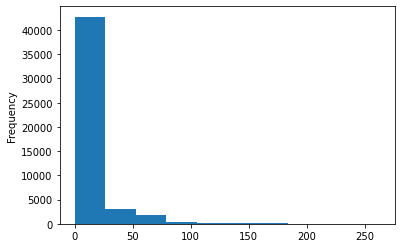

In [43]:
#moving on to the commission column
insurance_data['Commision (in value)'].plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

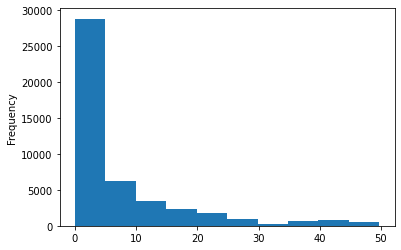

In [44]:
#looking at the 0 to 50 window
insurance_data.loc[insurance_data.loc[:,'Commision (in value)']<50,'Commision (in value)'].plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

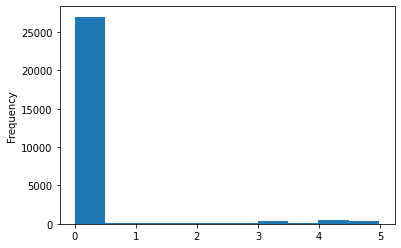

In [45]:
#looking at the 0 to 5 window
insurance_data.loc[insurance_data.loc[:,'Commision (in value)']<5,'Commision (in value)'].plot.hist(bins=10)

In [46]:
#checking the minimum and maximum values
insurance_data.loc[:,'Commision (in value)'].min(), insurance_data.loc[:,'Commision (in value)'].max()

(0.0, 262.76)

An initially thought would be to categorize this as 0-1, then 1-5, 5-10, then steps of 10 till 50, then steps of 50 till 150, then 150+

In [47]:
#applying the categorization described above
bins_commission = [-np.inf, 1, 5, 10, 20, 30, 40, 50, 100, 150, np.inf]
names_commission = ['<1', '1-5', '5-10', '10-20', '20-30', '30-40', '40-50', '50-100', '100-150','150+']

insurance_data['Commision (in value)'] = pd.cut(insurance_data['Commision (in value)'], bins_commission, labels=names_commission)
insurance_data

,Duration,Net Sales,Commision (in value),Age,Claim,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,...,Destination_SWEDEN,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA","Destination_TANZANIA, UNITED REPUBLIC OF",Destination_THAILAND,Destination_TURKEY,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_VIET NAM
0,60-80,15-20,10-20,29,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,80-100,60-70,<1,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20-40,20-25,<1,25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,<20,50-60,10-20,24,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,80-100,5-10,<1,23,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48255,20-40,40-45,<1,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48256,<20,50-60,10-20,30,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48257,<20,25-30,10-20,43,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48258,<20,15-20,<1,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:ylabel='Frequency'>

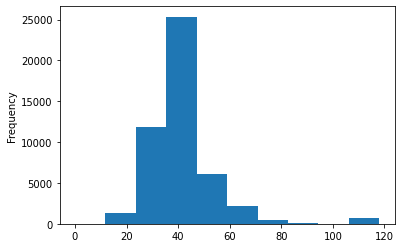

In [48]:
#finally the age column
insurance_data['Age'].plot.hist(bins=10)

In [49]:
#at a first glance the frequency above 100 years seems very, let's take a further look at it
insurance_data.loc[insurance_data.loc[:,'Age']>100]

,Duration,Net Sales,Commision (in value),Age,Claim,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,...,Destination_SWEDEN,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA","Destination_TANZANIA, UNITED REPUBLIC OF",Destination_THAILAND,Destination_TURKEY,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_VIET NAM
114,20-40,100-200,40-50,118,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
169,20-40,-25_to_0,5-10,118,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
295,<20,25-30,5-10,118,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
318,20-40,30-35,10-20,118,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
395,20-40,35-40,10-20,118,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47786,<20,30-35,10-20,118,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47878,40-60,25-30,5-10,118,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
48197,<20,30-35,10-20,118,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48243,<20,25-30,<1,118,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [50]:
insurance_data.loc[insurance_data.loc[:,'Age']>100].Age.value_counts()

118    753
Name: Age, dtype: int64

Two things strike as very odd, one is that there are 753 people over 100 years travelling, and second and even most odd that all of these have exactly 118 years old.
So my first hypothesis is that there is an inputation error in these rows.
So before moving on, we'll go on the safe side and remove these lines.

In [51]:
insurance_data = insurance_data.loc[insurance_data.loc[:,'Age']<100]
insurance_data

,Duration,Net Sales,Commision (in value),Age,Claim,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,...,Destination_SWEDEN,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA","Destination_TANZANIA, UNITED REPUBLIC OF",Destination_THAILAND,Destination_TURKEY,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_VIET NAM
0,60-80,15-20,10-20,29,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,80-100,60-70,<1,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20-40,20-25,<1,25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,<20,50-60,10-20,24,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,80-100,5-10,<1,23,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48255,20-40,40-45,<1,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48256,<20,50-60,10-20,30,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48257,<20,25-30,10-20,43,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48258,<20,15-20,<1,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:ylabel='Frequency'>

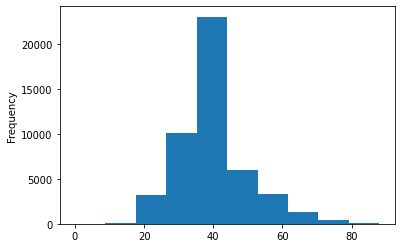

In [52]:
#taking a new look after removing the above values
insurance_data['Age'].plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

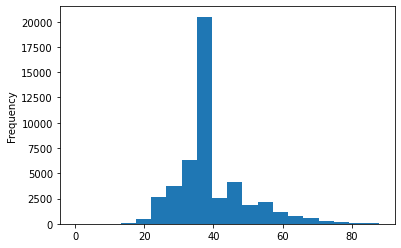

In [53]:
insurance_data['Age'].plot.hist(bins=20)

The approach this time will be:
<20, then steps of 5 till 60, then steps of 10 till 80 and finally 80+

In [54]:
#applying the categorization described above
bins_age = [-np.inf,20, 25, 30, 35, 40, 45, 50, 55, 60, 70, 80, np.inf]
names_age = ['<20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60','60-70','70-80',np.inf]

insurance_data['Age'] = pd.cut(insurance_data['Age'], bins_age, labels=names_age)
insurance_data

<ipython-input-54-2b5f0aec9b90>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_data['Age'] = pd.cut(insurance_data['Age'], bins_age, labels=names_age)


,Duration,Net Sales,Commision (in value),Age,Claim,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,...,Destination_SWEDEN,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA","Destination_TANZANIA, UNITED REPUBLIC OF",Destination_THAILAND,Destination_TURKEY,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_VIET NAM
0,60-80,15-20,10-20,25-30,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,80-100,60-70,<1,35-40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20-40,20-25,<1,20-25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,<20,50-60,10-20,20-25,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,80-100,5-10,<1,20-25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48255,20-40,40-45,<1,35-40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48256,<20,50-60,10-20,25-30,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48257,<20,25-30,10-20,40-45,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48258,<20,15-20,<1,60-70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
#now we can apply the above function to dummify the newly categorized columns
dummy_cols =['Duration', 'Net Sales', 'Commision (in value)', 'Age']

#dummifyin the columns above
insurance_data = create_dummy_df(insurance_data,dummy_cols,dummy_na)
insurance_data

,Claim,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,...,Age_25-30,Age_30-35,Age_35-40,Age_40-45,Age_45-50,Age_50-55,Age_55-60,Age_60-70,Age_70-80,Age_inf
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48255,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
48256,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
48257,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
48258,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [56]:
#finally let's take a look at the distribution of the target variable
insurance_data.Claim.value_counts()

0    46809
1      698
Name: Claim, dtype: int64

This is a very unbalanced dataset so we will need to apply a balancing technique and we'll go with smoteen

In [57]:
from sklearn.model_selection import train_test_split

#but first we'll need to split the target variable and the data into training and test sets
y = insurance_data['Claim']
X = insurance_data.drop(['Claim'], axis = 1)

# We'll split into 80% training, 20% test, and finally set the random_state = 42 to keep reproductability
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=42)

In [58]:
from imblearn.combine import SMOTEENN

#balancing the data
sm = SMOTEENN(random_state=42)
train_X_smote, train_y_smote = sm.fit_resample(train_X, train_y)

The next step will be to build a pipeline to not only tune the model parameters but to test more than one model at once.

In [59]:
#to do so we must import the base estimator class
from sklearn.base import BaseEstimator
from xgboost import XGBClassifier


class ClfSwitcher(BaseEstimator):
    def __init__(self, estimator= XGBClassifier(),):
        self.estimator = estimator

    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self
    
    def predict(self, X, y=None):
        return self.estimator.predict(X)
    def predict_proba(self, X):
        return self.estimator.predict_proba(X)
    
    def score(self, X, y):
        return self.estimator.score(X, y)

In [60]:
#we will test the most common algorithm for classification models (Random Forest Classifier)
#and we will compare it again XGBoost which usually has a better performance
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import recall_score

#since we have seen this is a very unbalanced dataset, even after performing oversampling to balance the data,
#a good way to evaluate the model is to focus on the prediction on the less represented class,
#for that a good evaluation metric will be the recall of the class 1, because it tells how good that class is being predicted.
#On top of that we will add the Matthews correlation coeficient that gives an overall score of how the model is performing.
scoring = { 
           'Recall': make_scorer(recall_score, pos_label=1,average='binary'),
           'MCC':make_scorer(matthews_corrcoef)}


def model_pipeline():
    pipeline = Pipeline([
        ('clf', ClfSwitcher())
    ])

    # specify parameters for grid search
    parameters = [
        
        {
        'clf__estimator': [RandomForestClassifier()],
        'clf__estimator__n_estimators': [5, 25, 50, 75, 100, 150, 200, 250],
        'clf__estimator__max_features': [0.4, 0.6, 0.8, 1 ],
        'clf__estimator__max_depth': [3, 4, 5, 6, 7],
        'clf__estimator__random_state': [42],
        
    },
        

]

    # create grid search object
    cv = GridSearchCV(pipeline, 
                      param_grid=parameters,
                      cv=3, 
                      verbose=1,
                      n_jobs=-1,
                      scoring=scoring,
                      refit='Recall',
                      return_train_score=True)
    
    return cv

In [61]:
#we will not instatiate the pipeline and initiate the grid search
cv = model_pipeline()
cv.fit(train_X_smote, train_y_smote)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 13.7min finished


GridSearchCV(cv=3, estimator=Pipeline(steps=[('clf', ClfSwitcher())]),
             n_jobs=-1,
             param_grid=[{'clf__estimator': [RandomForestClassifier(max_depth=7,
                                                                    max_features=0.4,
                                                                    n_estimators=25,
                                                                    random_state=42)],
                          'clf__estimator__max_depth': [3, 4, 5, 6, 7],
                          'clf__estimator__max_features': [0.4, 0.6, 0.8, 1],
                          'clf__estimator__n_estimators': [5, 25, 50, 75, 100,
                                                           150, 200, 250],
                          'clf__estimator__random_state': [42]}],
             refit='Recall', return_train_score=True,
             scoring={'MCC': make_scorer(matthews_corrcoef),
                      'Recall': make_scorer(recall_score, pos_label=1, average=bi

In [62]:
#checking the best parameters found
cv.best_params_

{'clf__estimator': RandomForestClassifier(max_depth=7, max_features=0.4, n_estimators=25,
                        random_state=42),
 'clf__estimator__max_depth': 7,
 'clf__estimator__max_features': 0.4,
 'clf__estimator__n_estimators': 25,
 'clf__estimator__random_state': 42}

In [63]:
#and the best score
cv.best_score_

0.4160511463211698

In [64]:
#we will now save the best model found in a variable to further investigate it
cv_model = ClfSwitcher(cv.best_estimator_)

Accuracy: 88.98%
Matthews Correlation Coefficient: 0.18
Recall: 56.76%
F1 Score: 13.83%
Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      9354
           1       0.08      0.57      0.14       148

    accuracy                           0.89      9502
   macro avg       0.54      0.73      0.54      9502
weighted avg       0.98      0.89      0.93      9502



<AxesSubplot:>

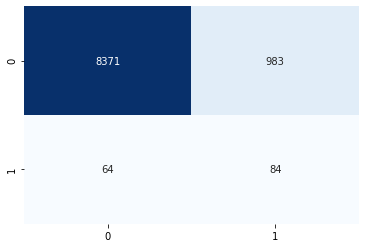

In [65]:
#fitting the best model with the data and looking at several metrics as well as the confusion matrix
cv_model.fit(train_X_smote,train_y_smote)
y_pred_smote_test = cv_model.predict(test_X)
predictions_smote_test = [round(value) for value in y_pred_smote_test]
# evaluate predictions
accuracy_smote_test = accuracy_score(test_y, predictions_smote_test)
mcc_smote_test = matthews_corrcoef(test_y, predictions_smote_test)
recall_smote_test = recall_score(test_y, predictions_smote_test)
f1score_smote_test = f1_score(test_y, predictions_smote_test)

print("Accuracy: %.2f%%" % (accuracy_smote_test * 100.0))
print("Matthews Correlation Coefficient: %.2f" % (mcc_smote_test))
print("Recall: %.2f%%" % (recall_smote_test*100.0))
print("F1 Score: %.2f%%" % (f1score_smote_test * 100.0))

print('Classification report: \n' + classification_report(test_y, predictions_smote_test))

cfm = confusion_matrix(test_y,predictions_smote_test)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')

In [66]:
#after a couple of testing these were the parameters that produced better results
#instead of over populating this notebook with the grid search we'll let only the best results found here
model = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.001,  
                      colsample_bytree = 0.5,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=220, 
                      reg_alpha = 0.3,
                      max_depth=6, 
                      gamma=5,
                      seed=42
                     )

In [67]:
eval_set = [(train_X_smote, train_y_smote), (test_X, test_y)]
eval_metric = ["auc","error"]
%time model.fit(train_X_smote, train_y_smote, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[06:59:11] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.82390	validation_0-error:0.22627	validation_1-auc:0.78709	validation_1-error:0.13587
[1]	validation_0-auc:0.84943	validation_0-error:0.18326	validation_1-auc:0.78813	validation_1-error:0.12787
[2]	validation_0-auc:0.87160	validation_0-error:0.17216	validation_1-auc:0.78658	validation_1-error:0.12250
[3]	validation_0-auc:0.89409	validation_0-error:0.19126	validation_1-auc:0.79752	validation_1-error:0.12639
[4]	validation_0-auc:0.90066	validation_0-error:0.17712	validation_1-auc:0.79950	validation_1-error:0.12482
[5]	validation_0-auc:0.90554	validation_0-error:0.18389	validation_1-auc:0.79931	validation_1-error:0.11987
[6]	validation_0-auc:0.906

[73]	validation_0-auc:0.92392	validation_0-error:0.17286	validation_1-auc:0.80373	validation_1-error:0.13229
[74]	validation_0-auc:0.92347	validation_0-error:0.17519	validation_1-auc:0.80373	validation_1-error:0.13229
[75]	validation_0-auc:0.92394	validation_0-error:0.17452	validation_1-auc:0.80368	validation_1-error:0.13229
[76]	validation_0-auc:0.92410	validation_0-error:0.17423	validation_1-auc:0.80343	validation_1-error:0.13229
[77]	validation_0-auc:0.92414	validation_0-error:0.17413	validation_1-auc:0.80344	validation_1-error:0.13397
[78]	validation_0-auc:0.92326	validation_0-error:0.17436	validation_1-auc:0.80337	validation_1-error:0.13197
[79]	validation_0-auc:0.92469	validation_0-error:0.17377	validation_1-auc:0.80284	validation_1-error:0.13176
[80]	validation_0-auc:0.92480	validation_0-error:0.17302	validation_1-auc:0.80292	validation_1-error:0.13345
[81]	validation_0-auc:0.92489	validation_0-error:0.17161	validation_1-auc:0.80301	validation_1-error:0.13050
[82]	validation_0-a

[148]	validation_0-auc:0.92932	validation_0-error:0.17191	validation_1-auc:0.81081	validation_1-error:0.13039
[149]	validation_0-auc:0.92924	validation_0-error:0.17154	validation_1-auc:0.81078	validation_1-error:0.13039
[150]	validation_0-auc:0.92766	validation_0-error:0.17182	validation_1-auc:0.81145	validation_1-error:0.13071
[151]	validation_0-auc:0.92767	validation_0-error:0.17235	validation_1-auc:0.81142	validation_1-error:0.13218
[152]	validation_0-auc:0.92771	validation_0-error:0.17154	validation_1-auc:0.81150	validation_1-error:0.13039
[153]	validation_0-auc:0.92774	validation_0-error:0.16945	validation_1-auc:0.81149	validation_1-error:0.12755
[154]	validation_0-auc:0.92747	validation_0-error:0.17154	validation_1-auc:0.81164	validation_1-error:0.13039
[155]	validation_0-auc:0.92747	validation_0-error:0.16948	validation_1-auc:0.81166	validation_1-error:0.12755
[156]	validation_0-auc:0.92754	validation_0-error:0.17154	validation_1-auc:0.81166	validation_1-error:0.13039
[157]	vali

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=220, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=False, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

Accuracy: 87.19%
Matthews Correlation Coefficient: 0.18
Recall: 60.14%
F1 Score: 12.76%
Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      9354
           1       0.07      0.60      0.13       148

    accuracy                           0.87      9502
   macro avg       0.53      0.74      0.53      9502
weighted avg       0.98      0.87      0.92      9502



<AxesSubplot:>

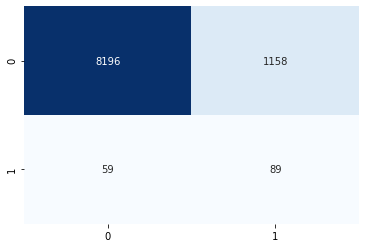

In [68]:
#fitting the best model with the data and looking at several metrics as well as the confusion matrix

y_pred_smote_test = model.predict(test_X)
predictions_smote_test = [round(value) for value in y_pred_smote_test]
# evaluate predictions
accuracy_smote_test = accuracy_score(test_y, predictions_smote_test)
mcc_smote_test = matthews_corrcoef(test_y, predictions_smote_test)
recall_smote_test = recall_score(test_y, predictions_smote_test)
f1score_smote_test = f1_score(test_y, predictions_smote_test)

print("Accuracy: %.2f%%" % (accuracy_smote_test * 100.0))
print("Matthews Correlation Coefficient: %.2f" % (mcc_smote_test))
print("Recall: %.2f%%" % (recall_smote_test*100.0))
print("F1 Score: %.2f%%" % (f1score_smote_test * 100.0))

print('Classification report: \n' + classification_report(test_y, predictions_smote_test))

cfm = confusion_matrix(test_y,predictions_smote_test)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')

Random Forest has a slightly higher f1_score while XGBoost has a slightly higher Recall, since we are trying to predict as much as we can from the class 1, we are going foward with XGboost

In [69]:
#furthermore we will look at the feature importance
importances = model.feature_importances_
features_names = []
ordered_importances = []
for i in np.argsort(importances)[::-1]:
    features_names.append(test_X.columns[i])
    ordered_importances.append(importances[i])
    print(test_X.columns[i],"%.4f" % importances[i])

Agency_C2B 0.1485
Agency_EPX 0.0647
Destination_SINGAPORE 0.0483
Agency Type_Travel Agency 0.0331
Product Name_Rental Vehicle Excess Insurance 0.0319
Agency_CWT 0.0300
Product Name_Cancellation Plan 0.0294
Agency_LWC 0.0265
Agency_JZI 0.0259
Product Name_2 way Comprehensive Plan 0.0257
Duration_60-80 0.0247
Product Name_Basic Plan 0.0234
Duration_40-60 0.0186
Destination_MALAYSIA 0.0184
Duration_20-40 0.0169
Destination_THAILAND 0.0161
Age_25-30 0.0155
Destination_AUSTRALIA 0.0154
Agency_RAB 0.0143
Destination_BRUNEI DARUSSALAM 0.0140
Age_40-45 0.0129
Duration_100-200 0.0128
Net Sales_35-40 0.0121
Duration_80-100 0.0115
Age_30-35 0.0112
Age_35-40 0.0107
Product Name_Value Plan 0.0106
Product Name_Bronze Plan 0.0106
Net Sales_25-30 0.0096
Duration_300-400 0.0095
Product Name_Travel Cruise Protect 0.0094
Net Sales_40-45 0.0093
Agency_SSI 0.0090
Product Name_Ticket Protector 0.0090
Net Sales_90-100 0.0080
Destination_PHILIPPINES 0.0076
Destination_ITALY 0.0076
Duration_200-300 0.0076
Agen

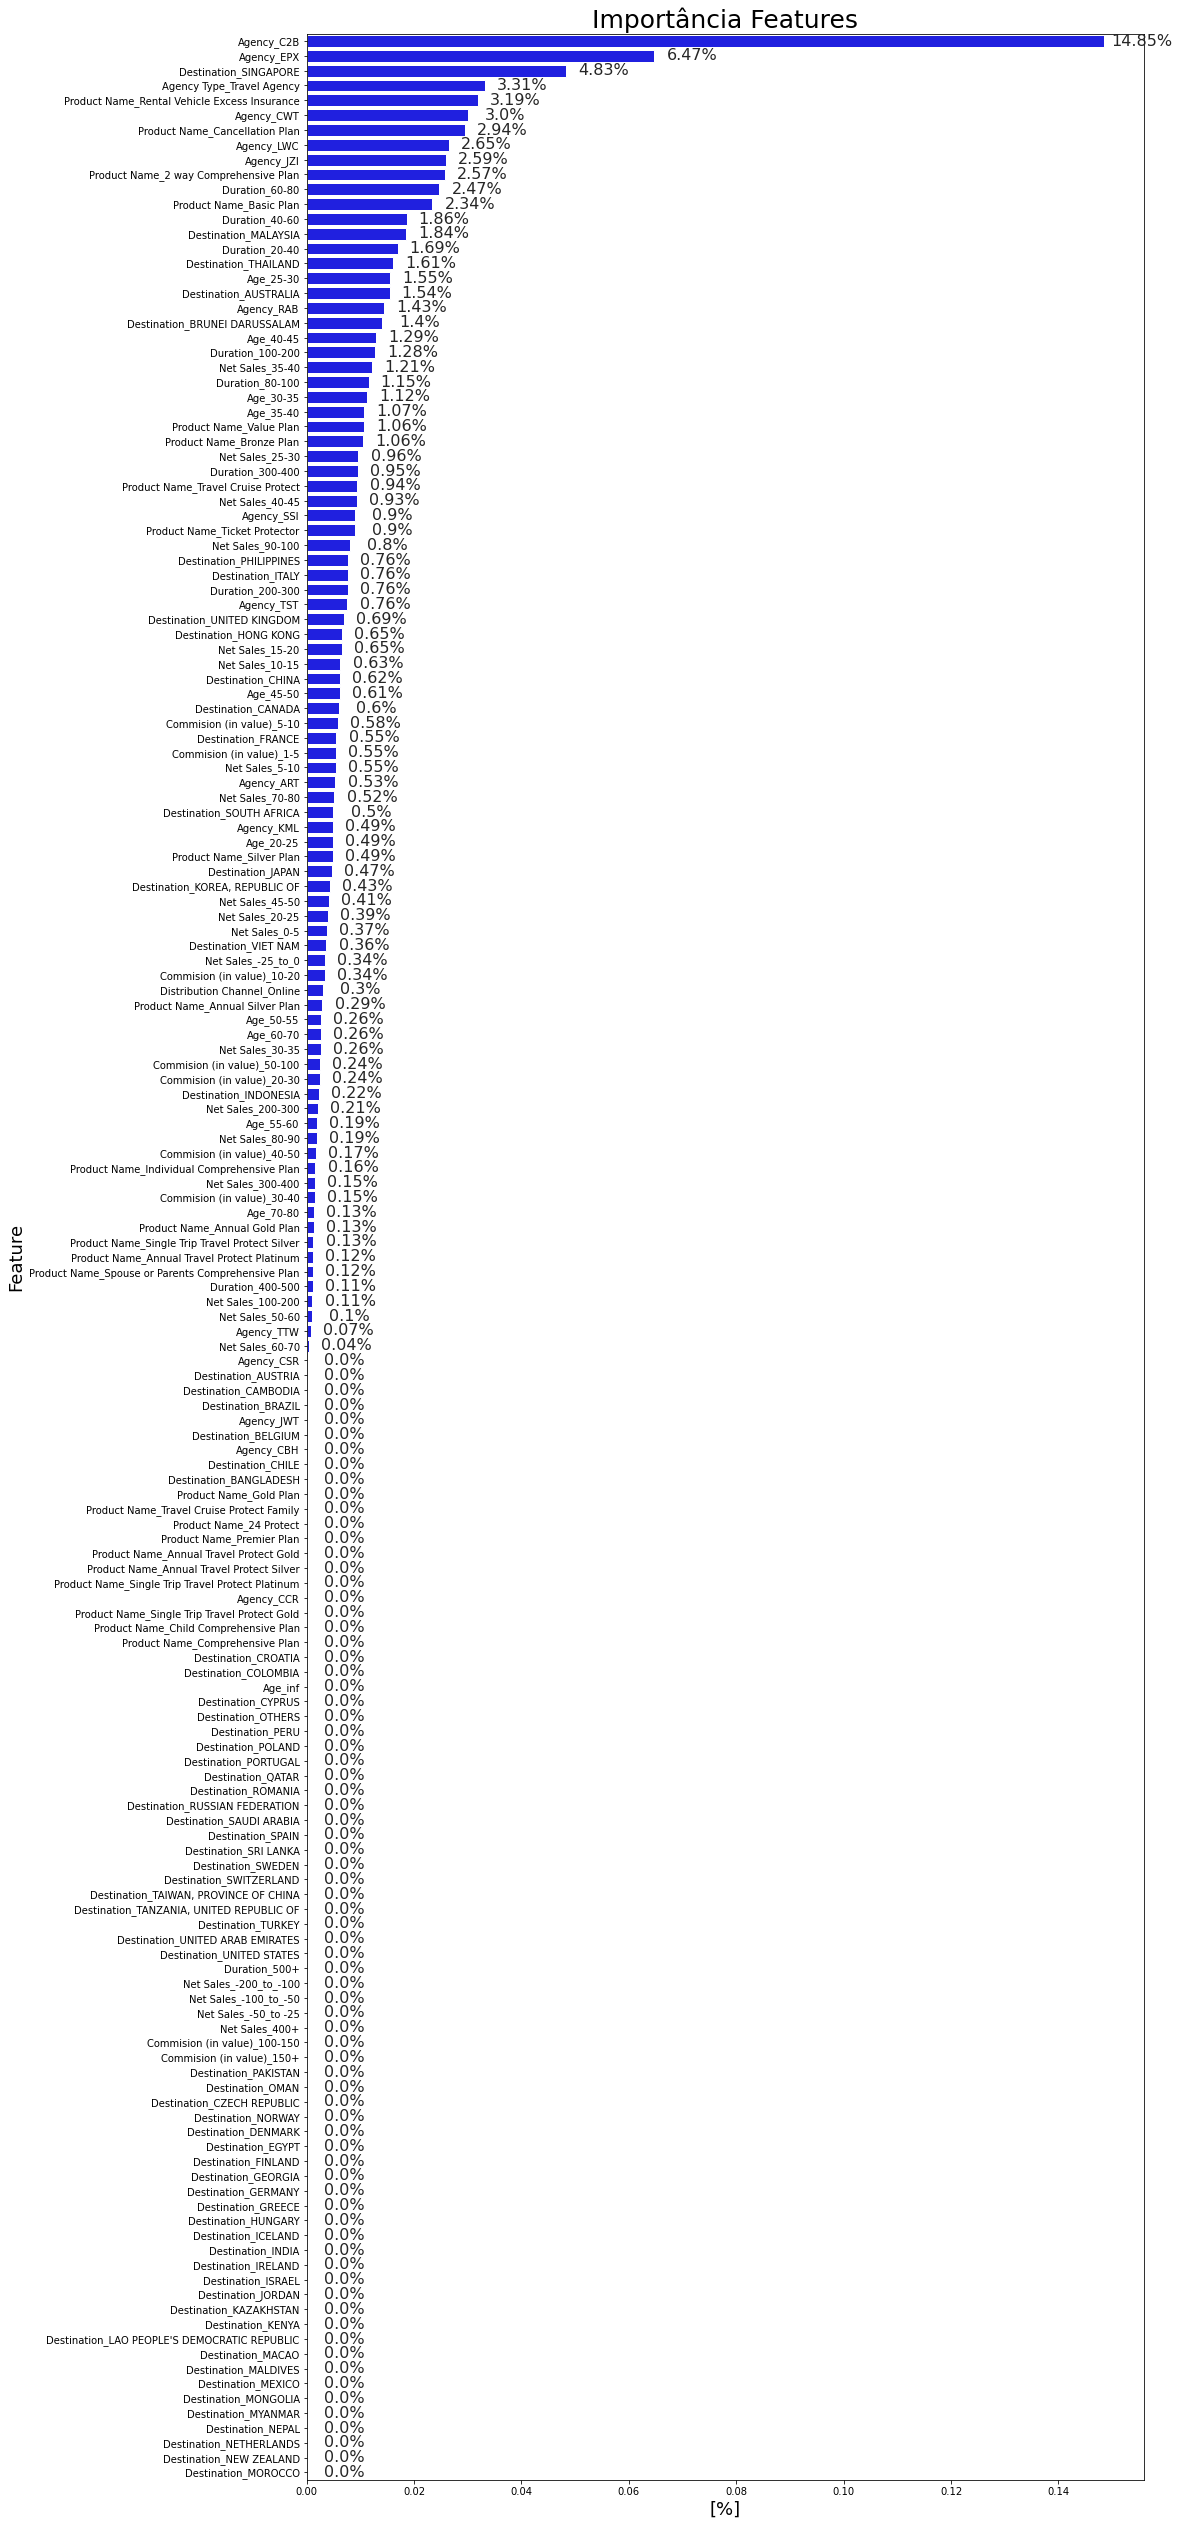

In [70]:
#plotting the feature importance
ordered_importances_porcentagem = [(round(element * 100,2))for element in ordered_importances]
f, ax = plt.subplots(figsize=(15, 45))
sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(x=ordered_importances,y=features_names,
            label="Features", color="blue")
plt.title('Importância Features',fontsize=25)
plt.xlabel('[%]',fontsize=18)
plt.ylabel('Feature',fontsize=18)

for i in range (0,len(ordered_importances)):
    
    plt.text(x=ordered_importances[i]+0.007, y=i , s=str(round(ordered_importances[i]*100,2))+'%'
             ,horizontalalignment='center',verticalalignment='center', fontsize=16)

plt.show()

In [71]:
#finally we apply the transformation applied to the training data to the test data
test_data.drop(columns='Gender',inplace=True)

destination_frequency = test_data['Destination'].value_counts()
destination_sub10 = destination_frequency .loc[destination_frequency <10]

#list of destinations of countries with less than 10 appearances
destination_sub10.index
others_destination = destination_sub10.index
test_data.Destination.replace(others_destination,'OTHERS',inplace=True)

dummy_na = False
dummy_cols =['Agency', 'Agency Type', 'Distribution Channel', 'Product Name','Destination']

#dummifying the columns above
test_data = create_dummy_df(test_data,dummy_cols,dummy_na)

#applying the categorization described above
bins = [0, 20, 40, 60, 80, 100, 200, 300, 400, 500, np.inf]
names = ['<20', '20-40', '40-60', '60-80', '80-100', '100-200', '200-300', '300-400', '400-500','500+']

test_data['Duration'] = pd.cut(test_data['Duration'], bins, labels=names)

bins_commission = [-np.inf, 1, 5, 10, 20, 30, 40, 50, 100, 150, np.inf]
names_commission = ['<1', '1-5', '5-10', '10-20', '20-30', '30-40', '40-50', '50-100', '100-150','150+']

test_data['Commision (in value)'] = pd.cut(test_data['Commision (in value)'], bins_commission, labels=names_commission)

bins_net_sales = [-np.inf, -200, -100, -50 , -25, 0, 5, 10, 15, 20, 25, 30, 35, 40, 
        45, 50, 60, 70, 80, 90, 100, 200, 300, 400, np.inf]
names_net_sales = ['<-200', '-200_to_-100', '-100_to_-50', '-50_to -25', '-25_to_0', 
         '0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35','35-40','40-45','45-50','50-60',
                  '60-70','70-80','80-90','90-100','100-200','200-300','300-400','400+']

test_data['Net Sales'] = pd.cut(test_data['Net Sales'], bins_net_sales, labels=names_net_sales)

bins_age = [-np.inf,20, 25, 30, 35, 40, 45, 50, 55, 60, 70, 80, np.inf]
names_age = ['<20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60','60-70','70-80',np.inf]

test_data['Age'] = pd.cut(test_data['Age'], bins_age, labels=names_age)

#now we can apply the above function to dummify the newly categorized columns
dummy_cols =['Duration', 'Net Sales', 'Commision (in value)', 'Age']

#dummifying the columns above
test_data = create_dummy_df(test_data,dummy_cols,dummy_na)

In [72]:
#checking the columns sizes in both sets
test_data.shape, insurance_data.shape

((15832, 146), (47507, 166))

In [73]:
# Get missing columns in the test set
missing_cols = set( train_X_smote.columns ) - set( test_data.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test_data[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test_data = test_data[train_X_smote.columns]

In [74]:
prediction = model.predict(test_data)

In [75]:
index = range(0,len(prediction))
prediction = pd.DataFrame(data=prediction,index=index, columns=["prediction"])

In [76]:
prediction

,prediction
0,0
1,0
2,0
3,0
4,0
...,...
15827,0
15828,1
15829,0
15830,0


In [77]:
prediction.to_csv('prediction.csv',index=False)

In [78]:
#saving the predictions with Random Forest as well
prediction_RF = cv_model.predict(test_data)
index = range(0,len(prediction_RF))
prediction_RF = pd.DataFrame(data=prediction_RF,index=index, columns=["prediction"])
prediction_RF.to_csv('prediction_RF.csv',index=False)

In [79]:
#saving the models
import joblib
joblib.dump(model,'insurance_model.dat')
joblib.dump(cv_model,'insurance_model_RF.dat')

['insurance_model_RF.dat']

After this the next steps to futher investigate performance increase would be:

1 - We can see that there are quite a few destination columns with 0 importance, so we would try and group these destinations in regions like: Europe, Asia, etc.

2 - Test the categorized numerical features with their original values.

3 - Test the numerical features with normalization and standarization.

4 - Further investigate feature selection.

5 - Train the model with 100% of the training data. While doing this doesn't allow any type of evaluation, it could help improve the score in the test data.